In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [3]:
df= pd.read_csv(r"C:\Users\USER\Desktop\github\NIFTY500_dataset\Dataset\000_RELIANCE.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,345.128540,351.542725,340.348846,349.957764,323.036682,8679938
1,2012-01-03,352.780975,360.037201,351.839905,358.922760,331.312073,9455771
2,2012-01-04,360.284851,362.043182,353.325836,354.712677,327.425934,8557084
3,2012-01-05,354.143066,359.071350,343.791199,346.465851,319.813477,13364666
4,2012-01-06,345.252350,358.600830,345.054230,355.406097,328.065948,9495456
...,...,...,...,...,...,...,...
2460,2021-12-27,2361.550049,2378.000000,2348.100098,2370.250000,2370.250000,1853948
2461,2021-12-28,2375.600098,2404.850098,2373.050049,2398.399902,2398.399902,2941883
2462,2021-12-29,2391.000000,2419.000000,2382.100098,2402.500000,2402.500000,7118779
2463,2021-12-30,2400.000000,2404.949951,2345.600098,2359.100098,2359.100098,13537254


# data processing 


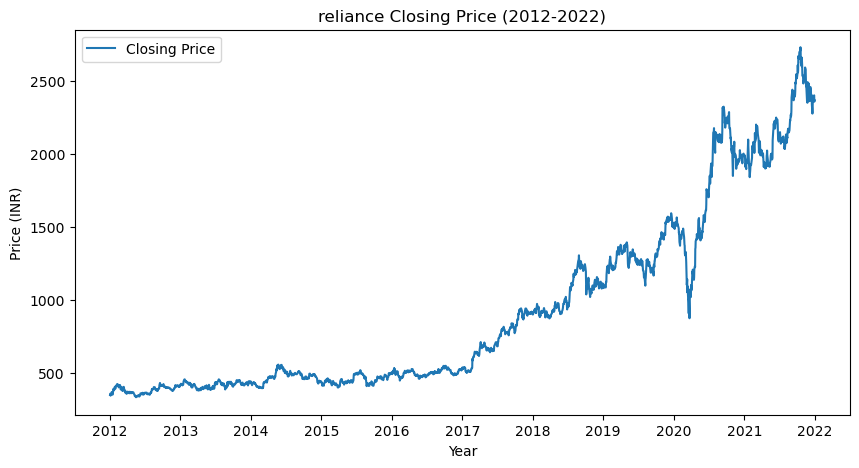

count    2465.000000
mean      926.734317
std       624.303922
min       334.875702
25%       440.747162
50%       537.455444
75%      1266.692993
max      2731.850098
Name: Close, dtype: float64


In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.title('reliance Closing Price (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


print(df['Close'].describe())

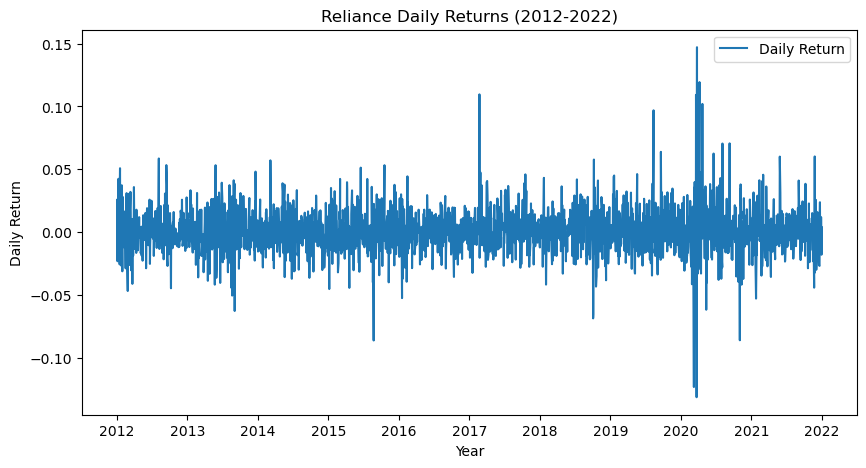

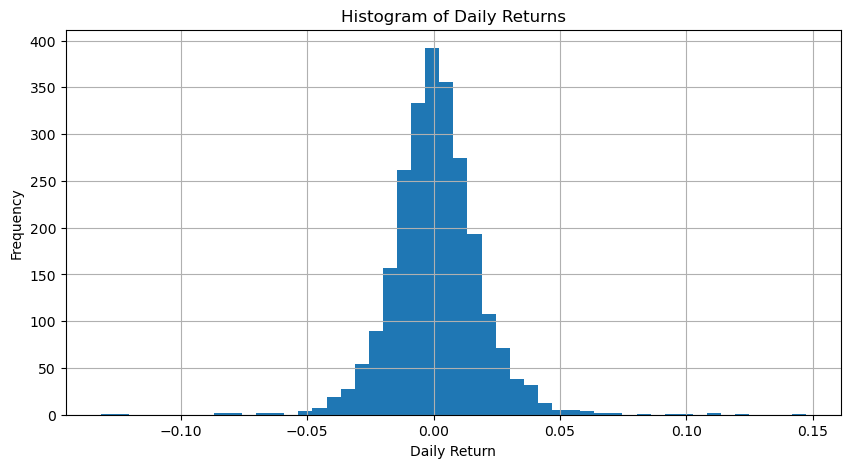

In [13]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('Reliance Daily Returns (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

df['Daily Return'].hist(bins=50, figsize=(10, 5))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [14]:
volatility = df['Daily Return'].std()
print(f'Volatility (Standard Deviation): {volatility}')

var_95 = df['Daily Return'].quantile(0.05)
print(f'Value at Risk (VaR) at 95% confidence level: {var_95}')

risk_free_rate = 0.04 / 252
sharpe_ratio = (df['Daily Return'].mean() - risk_free_rate) / volatility
print(f'Sharpe Ratio: {sharpe_ratio}')


Volatility (Standard Deviation): 0.017948947287662945
Value at Risk (VaR) at 95% confidence level: -0.025383768160333754
Sharpe Ratio: 0.04334789452462024


In [17]:
reliance_df = pd.read_csv(r"C:\Users\USER\Desktop\github\NIFTY500_dataset\Dataset\000_RELIANCE.csv")
reliance_df['Date'] = pd.to_datetime(reliance_df['Date'])
reliance_df.set_index('Date', inplace=True)
reliance_df['Daily Return'] = reliance_df['Close'].pct_change()
nifty_df = pd.read_csv(r'C:\Users\USER\Downloads\archive\NIFTY 50.csv')
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])
nifty_df.set_index('Date', inplace=True)
nifty_df['Daily Return'] = nifty_df['Close'].pct_change()
aligned_data = reliance_df['Daily Return'].align(nifty_df['Daily Return'], join='inner')
cov_matrix = aligned_data[0].cov(aligned_data[1])
market_var = aligned_data[1].var()
beta = cov_matrix / market_var
print(f'Beta of reliance: {beta}')


Beta of reliance: 1.0898204556356965


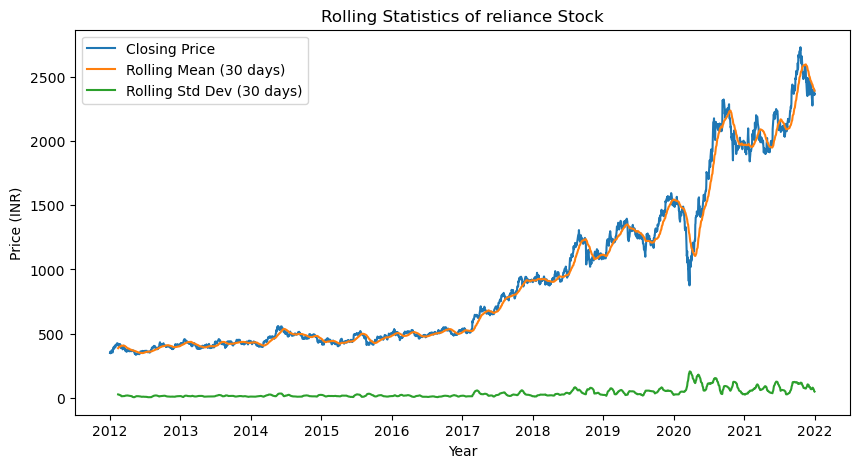

In [19]:
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling Std Dev'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['Rolling Mean'], label='Rolling Mean (30 days)')
plt.plot(df['Rolling Std Dev'], label='Rolling Std Dev (30 days)')
plt.title('Rolling Statistics of reliance Stock')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [20]:
df.to_csv('reliance_Risk_Analysis.csv')